#lab 4


In [1]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [3]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [4]:

cur=conn.cursor()

# q1

In [9]:
sql_q1 = """
            select * from gp4.student
            """


In [10]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,Math
2,s3@jmu.edu,s3,English
3,s4@jmu.edu,s4,Humanaff
4,s5@jmu.edu,s5,Education
5,s6@jmu.edu,s6,Science
6,s7@jmu.edu,s7,Geology
7,s8@jmu.edu,s8,CS
8,s9@jmu.edu,s9,BIO
9,s10@jmu.edu,s10,Art


# q2

In [11]:

sql_q2 = """
        select gp4.professor.p_name,
        gp4.course.c_name
        from gp4.professor
        inner join gp4.course
        on gp4.professor.p_email = gp4.course.p_email
        
        """

In [12]:

df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,s1,data min1
1,s2,data min2
2,s5,data min3
3,s4,data min 4
4,s5,None
5,s6,None
6,s8,None
7,s9,None
8,s10,None


# Q3

In [13]:

sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp4.enroll_list
        group by c_number
        order by enrolled desc
        """

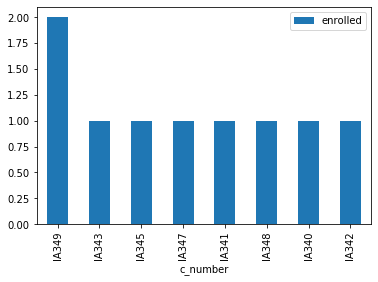

In [14]:

df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

# Q4

In [15]:
sql_q5_professor = """
                    insert into gp4.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p@jmu.edu','new_p','new_office')

In [16]:
cur.execute(sql_q5_professor)

In [17]:
conn.commit()

In [59]:
df=pandas.read_sql_query('select * from gp4.professor',conn)
df[:]

InterfaceError: connection already closed

In [60]:
sql_q5_course = """
                    insert into gp4.course(c_number,c_name,room,p_email)
                    values('{}','{}','{}','{}')
                    """.format('ia_new','new_c_name','online','new_p@jmu.edu')

In [61]:
cur.execute(sql_q5_course)

InterfaceError: cursor already closed

In [62]:
conn.commit()

InterfaceError: connection already closed

In [63]:
df=pandas.read_sql_query('select * from gp4.course',conn)
df[:]

InterfaceError: connection already closed

# q6

In [64]:
sql_q6_course = """
                update gp4.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','weixx@jmu.edu')

In [65]:
cur.execute(sql_q6_course)

InterfaceError: cursor already closed

In [66]:
#cur.execute('ROLLBACK')

In [67]:
conn.commit()

InterfaceError: connection already closed

In [68]:
df=pandas.read_sql_query('select * from gp4.course',conn)
df[:]

InterfaceError: connection already closed

In [69]:
sql_q6_professor = """
                delete from gp4.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [70]:
cur.execute(sql_q6_professor)

InterfaceError: cursor already closed

In [71]:
conn.commit()

InterfaceError: connection already closed

In [72]:
df=pandas.read_sql_query('select * from gp4.professor',conn)
df[:]

InterfaceError: connection already closed

# close connection

In [73]:
cur.close()
conn.close()